In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
import os
os.getcwd()
#data = pd.read_excel("Nifty 50 Historical Data")

'C:\\Users\\Asus\\Algo_python'

In [135]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\NSEI.csv")
data.head()
#data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700.0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200.0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600.0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400.0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700.0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1397 non-null   object 
 1   Open       1395 non-null   float64
 2   High       1395 non-null   float64
 3   Low        1395 non-null   float64
 4   Close      1395 non-null   float64
 5   Adj Close  1395 non-null   float64
 6   Volume     1395 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.5+ KB


In [137]:
nifty.tail()

,Date,Open,High,Low,Close,Returns
242,26-AUG-2024,24906.1,25043.80,24874.70,25010.60,0.007551
243,27-AUG-2024,25024.8,25073.10,24973.65,25017.75,0.000286
244,28-AUG-2024,25030.8,25129.60,24964.65,25052.35,0.001383
245,29-AUG-2024,25035.3,25192.90,24998.50,25151.95,0.003976
246,30-AUG-2024,25249.7,25268.35,25199.40,25235.90,0.003338


In [138]:
nifty.info()
print(nifty.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 1 to 246
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     246 non-null    object 
 1   Open     246 non-null    float64
 2   High     246 non-null    float64
 3   Low      246 non-null    float64
 4   Close    246 non-null    float64
 5   Returns  246 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.5+ KB
Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Returns'], dtype='object')


In [139]:
nifty['Returns'] = nifty['Close '].pct_change()
nifty

,Date,Open,High,Low,Close,Returns
1,04-SEP-2023,19525.05,19545.15,19432.85,19528.80,NaN
2,05-SEP-2023,19564.65,19587.05,19525.75,19574.90,0.002361
3,06-SEP-2023,19581.20,19636.45,19491.50,19611.05,0.001847
4,07-SEP-2023,19598.65,19737.00,19550.05,19727.05,0.005915
5,08-SEP-2023,19774.80,19867.15,19728.05,19819.95,0.004709
...,...,...,...,...,...,...
242,26-AUG-2024,24906.10,25043.80,24874.70,25010.60,0.007551
243,27-AUG-2024,25024.80,25073.10,24973.65,25017.75,0.000286
244,28-AUG-2024,25030.80,25129.60,24964.65,25052.35,0.001383
245,29-AUG-2024,25035.30,25192.90,24998.50,25151.95,0.003976


In [140]:
nifty.dropna(inplace=True)
nifty 

,Date,Open,High,Low,Close,Returns
2,05-SEP-2023,19564.65,19587.05,19525.75,19574.90,0.002361
3,06-SEP-2023,19581.20,19636.45,19491.50,19611.05,0.001847
4,07-SEP-2023,19598.65,19737.00,19550.05,19727.05,0.005915
5,08-SEP-2023,19774.80,19867.15,19728.05,19819.95,0.004709
6,11-SEP-2023,19890.00,20008.15,19865.35,19996.35,0.008900
...,...,...,...,...,...,...
242,26-AUG-2024,24906.10,25043.80,24874.70,25010.60,0.007551
243,27-AUG-2024,25024.80,25073.10,24973.65,25017.75,0.000286
244,28-AUG-2024,25030.80,25129.60,24964.65,25052.35,0.001383
245,29-AUG-2024,25035.30,25192.90,24998.50,25151.95,0.003976


In [153]:
#define confidence level
confidence_level = 0.95

var = np.percentile(nifty['Returns'],(1- confidence_level)*100)
print(var)
VaR = -var*nifty['Close '].iloc[-1]
print(f"VaR at {confidence_level*100}% confidence level: Rs{VaR:.2f}")

-0.010948045541979545
VaR at 95.0% confidence level: Rs276.28


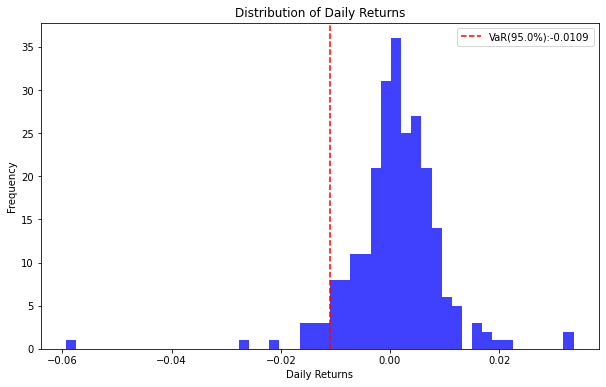

In [145]:
plt.figure(figsize = (10,6))
plt.hist(nifty['Returns'], bins=50, alpha=0.75, color='blue')
plt.axvline(x=var, color='red', linestyle='--', label=f'VaR({confidence_level*100}%):{var:.4f}')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [116]:
## Monte Carlo simulation VaR modeling 

In [146]:
mu = nifty['Returns'].mean()
sigma = nifty['Returns'].std()

print(f'Mean of Returns; {mu}')
print('Standard deviation of returns: {}'.format(sigma))

Mean of Returns; 0.0010819900456745034
Standard deviation of returns: 0.008356756258843656


In [155]:
# Simulate Future Returns
num_simulations = 10000
days = 1

simulated_returns = np.random.normal(mu, sigma, num_simulations)

print(simulated_returns[:5])

[-0.00164385 -0.01212859  0.004617   -0.0066888   0.00094679]


In [156]:
# Calculate the Portfolio Value for Each Simulated Return 

current_value = nifty['Close '].iloc[-1]

simulated_portfolio_values = current_value*(1+simulated_returns)

print(simulated_portfolio_values[:5])

[25194.41608612 24929.82407485 25352.41425218 25067.10223138
 25259.79297202]


In [157]:
# Calculate the Simulated Losses

simulated_losses = current_value - simulated_portfolio_values

print(simulated_losses[:5])

[  41.48391388  306.07592515 -116.51425218  168.79776862  -23.89297202]


In [158]:
# Determine the VaR at the Desired Confidence Level

simulated_losses_sorted = np.sort(simulated_losses)

confidence_level = 0.95

var_percentile = np.percentile(simulated_losses_sorted, (1- confidence_level)*100)

print(f'Monte Carlo VaR at {confidence_level*100}% confidence level: Rs{var_percentile*-1:.2f}')

Monte Carlo VaR at 95.0% confidence level: Rs374.53
